<a href="https://colab.research.google.com/github/DestonSJU/AI/blob/main/HW7/HW7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The first thing I did was import the neccesary packages, upload the nasa_asteroid data set, and put the data into a dataframe. Next I removed all of the object variables, as they couldn't be converted into numerical values.

In [1]:
#Initial Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

In [2]:
#Upload the csv data file
from google.colab import files
Upload = files.upload()

Saving nasa_asteroid.csv to nasa_asteroid.csv


In [3]:
#Creates dataframe using the data
data = pd.read_csv("nasa_asteroid.csv")
data

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),...,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Equinox,Hazardous
0,3703080,3703080,21.600,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,J2000,True
1,3723955,3723955,21.300,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,...,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,J2000,False
2,2446862,2446862,20.300,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,...,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,J2000,True
3,3092506,3092506,27.400,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,...,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,J2000,False
4,3514799,3514799,21.600,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,J2000,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4682,3759007,3759007,23.900,0.044112,0.098637,44.111820,98.637028,0.027410,0.061290,144.723824,...,164.183305,457.179984,0.741558,276.395697,1.581299,2.457708e+06,304.306025,0.787436,J2000,False
4683,3759295,3759295,28.200,0.006089,0.013616,6.089126,13.615700,0.003784,0.008460,19.977449,...,345.225230,407.185767,0.996434,42.111064,1.153835,2.458088e+06,282.978786,0.884117,J2000,False
4684,3759714,3759714,22.700,0.076658,0.171412,76.657557,171.411509,0.047633,0.106510,251.501180,...,37.026468,690.054279,0.965760,274.692712,2.090708,2.458300e+06,203.501147,0.521698,J2000,False
4685,3759720,3759720,21.800,0.116026,0.259442,116.025908,259.441818,0.072095,0.161210,380.662441,...,163.802910,662.048343,1.185467,180.346090,1.787733,2.458288e+06,203.524965,0.543767,J2000,False


In [4]:
#Remove variables
data = data.drop('Close Approach Date', axis=1)
data = data.drop('Orbiting Body', axis=1)
data = data.drop('Orbit Determination Date', axis=1)
data = data.drop('Equinox', axis=1)

Next, after setting up a scaler, I split the data into predictor(X) and response(y) variables. I then sclaed the predictor variables. Then I split the data into train, validation, and test data. I used a 70-30 train test split and shuffled and stratified the data.

In [5]:
#Set up scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [6]:
#Split data into X and y
X = data.iloc[:,0:35]
y = data.iloc[:,35]

#Scale X data
X = scaler.fit_transform(X)

#Split data into train, validation and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42, shuffle=True, stratify=y_train)

After spliting the data I created the MLP Classifer. I used two hidden layers with sizes 40 and 50 respectively. I then created arrays to store the accuracies for the train, validation, and test data. Next I ran the classifier 1000 times and recorded the accuracies for each iteration. After running the classifier, I plotted the train, validation and test accuracies, plotted the loss curve, printed the train, validation, and test accuracies and created and displayed the confusion matrix. After analyzing the results I got, I found that the model was very accurate. The train accuracy was 1, the validation accuracy was 0.9787, and the test accuracy was 0.9758. These numbers are very high and there isn't too much of a difference between the train and the test data. Looking at the accuracy plot, all 3 accuracy rose pretty quickly each iteration until about 50-75 iterations in, depending on which accuracy. At this point is where the plot leveled out for the most part at close to the final peak accuracies with only minor spikes and dips along the way. Looking at the loss curve, the error of the model went down during the first 25-50 iterations. After this point the error went down at a slower rate up until about 175-200 iterations. After this point, the error was about the same, at a value of around 0.02. This is a low amount of error and this number makes sense since the test accuracy of the model is very high. Finally, looking at the confusion matrix, there were only 34/1407 that were misclassified, meanning that 1373/1407 were correctly identified. These are overall good numbers and make sense with the high model test accuracy.

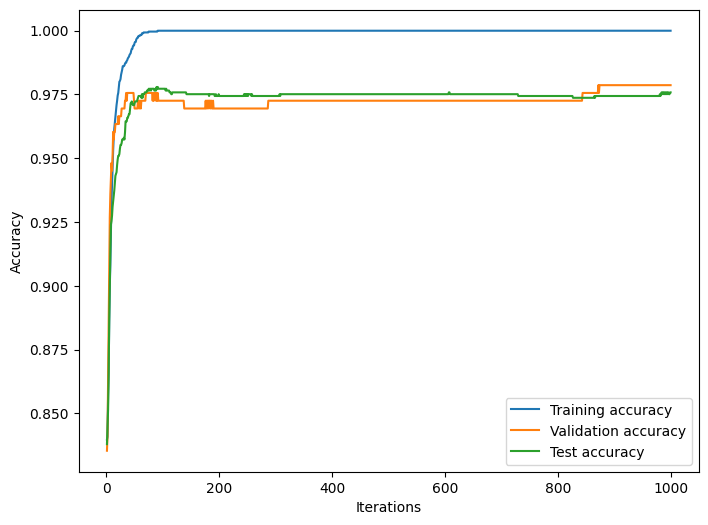

In [7]:
# Create an MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(40,50), max_iter=1000, random_state=42)

# Create arrays to store train, validation, and test accuracies
train_accuracies = []
val_accuracies = []
test_accuracies = []

# Run the classifier 1000 times and record accuracies
for i in range(1000):
    mlp.partial_fit(X_train, y_train, classes=np.unique(y_train))
    train_accuracies.append(mlp.score(X_train, y_train))
    val_accuracies.append(mlp.score(X_val, y_val))
    test_accuracies.append(mlp.score(X_test, y_test))

# Plot the training, validation, and test accuracies
plt.figure(figsize=(8, 6))
plt.plot(range(1, 1001), train_accuracies, label='Training accuracy')
plt.plot(range(1, 1001), val_accuracies, label='Validation accuracy')
plt.plot(range(1, 1001), test_accuracies, label='Test accuracy')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

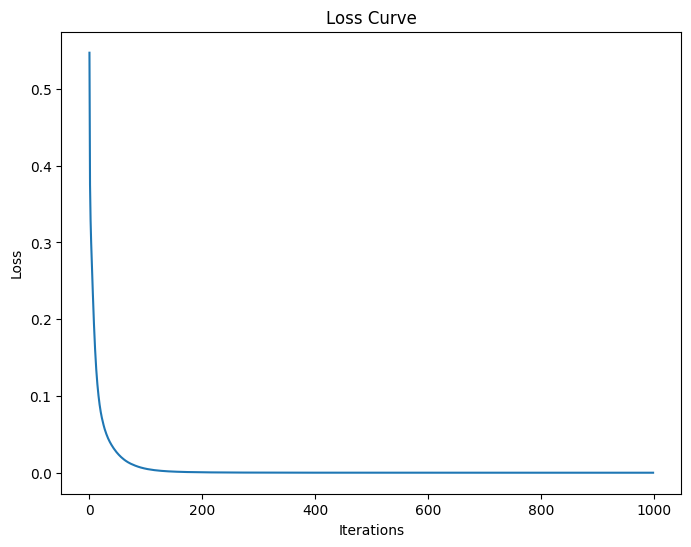

In [8]:
#Display the loss curve
plt.figure(figsize=(8, 6))
plt.plot(mlp.loss_curve_)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.show()

In [9]:
#Calculate and print the train, validation, and test accuracies
train_accuracy = mlp.score(X_train, y_train)
validation_accuracy = mlp.score(X_val, y_val)
test_accuracy = mlp.score(X_test, y_test)
print(f"Overall Training Accuracy: {train_accuracy}")
print(f"Overall Validation Accuracy: {validation_accuracy}")
print(f"Overall Test Accuracy: {test_accuracy}")

Overall Training Accuracy: 1.0
Overall Validation Accuracy: 0.9786585365853658
Overall Test Accuracy: 0.9758351101634684


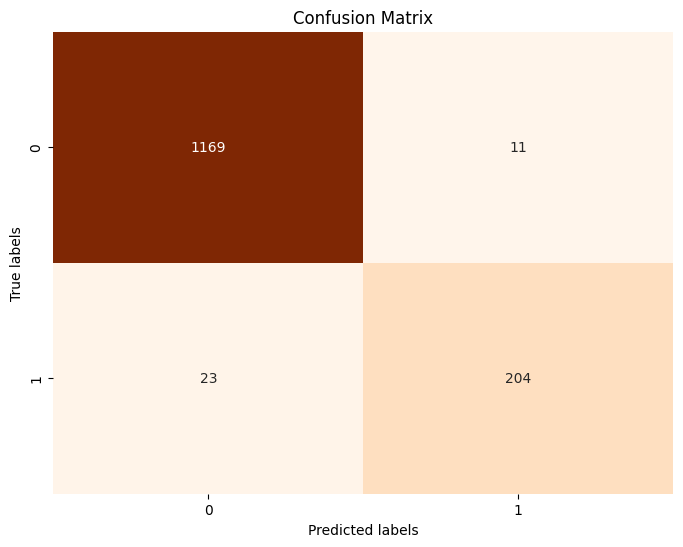

In [10]:
#Calculate and display the confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
y_pred = mlp.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

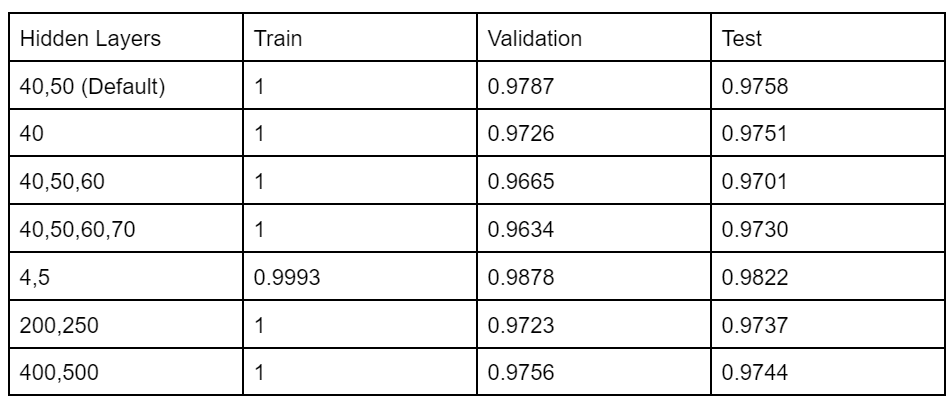

Next I looked at how changing the number and size of the hidden layers influenced the model. The first thing I noticed is that almost all of the different models I tried had an test accuracy of 1, with the only model where the test accuracy was lower was the model with 2 hidden layers of size 4 and 5 with a test accuracy of 0.9993 which is still very close to 1.When adjusting the amount of hidden layers, I found that the test accuracies were very close to each other, with less than a 0.01 difference between the different amounts of hidden layers that I tried(1,2,3,4). The model that had the highest accuracy was the one with two hidden layers (0.9758), with the model with 1 hidden layer being very close to it (0.9751). The models with 3 and 4 hidden layers had accuracies of 0.9701 and 0.9730 respectively, which were slighlty lower than the other models, which shows that they might be slightly overfitted. Overall, adding more hidden layers didn't influence the model's accuracy very much and the accuracy stayed largely the same. Looking at changing the size of hidden layers, I found that having smaller hidden layers improved the accuracy of the model. While all of the test accuracies were within 0.01 of each other, the model with hidden layers of size 4 and 5 had the highest accuracy (0.9822). The other models had accuracies closer to each other, with the model with hidden layers of size 40 and 50 with an accuracy of 0.9758, size 200 and 250 with an accuracy of 0.9737, and size 400 and 500 with an accuracy of 0.9744. This shows that as larger hidden layers were added, the model became overfitted and as a result, the accuracy of the model decreased. Overall, the accuracy of the model didn't change much when changing the size of the hidden layers, but having smaller hidden layers produced slightly better accuracy than having larger hidden layers.

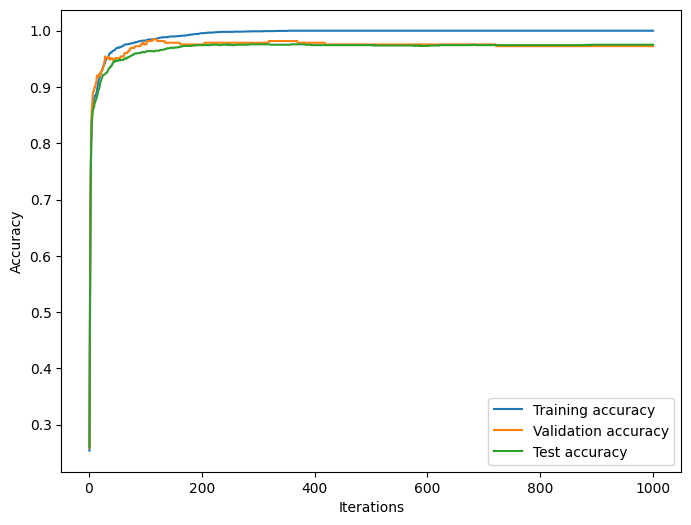

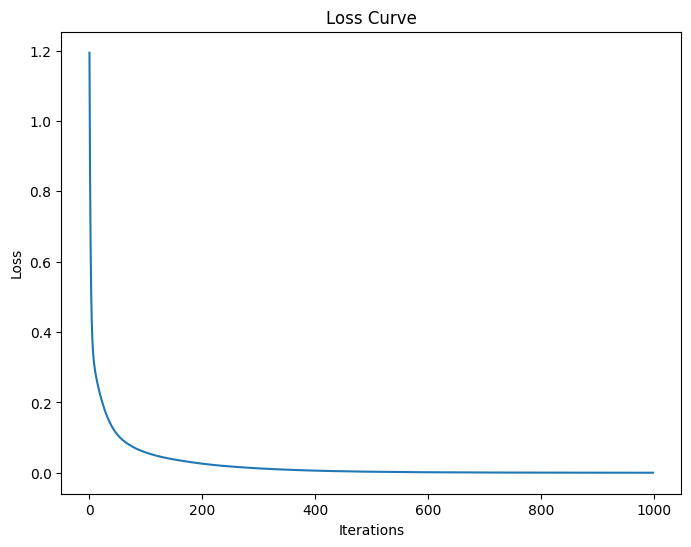

Overall Training Accuracy: 1.0
Overall Validation Accuracy: 0.9725609756097561
Overall Test Accuracy: 0.9751243781094527


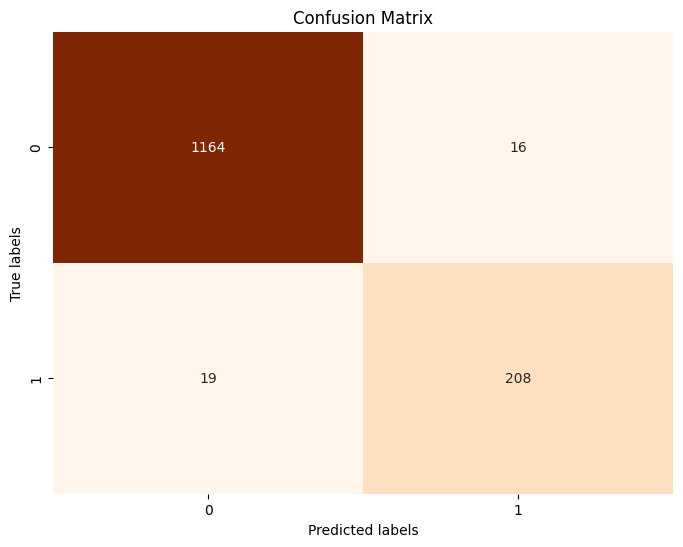

In [11]:
# Create an MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(40), max_iter=1000, random_state=42)

# Create arrays to store train, validation, and test accuracies
train_accuracies = []
val_accuracies = []
test_accuracies = []

# Run the classifier 1000 times and record accuracies
for i in range(1000):
    mlp.partial_fit(X_train, y_train, classes=np.unique(y_train))
    train_accuracies.append(mlp.score(X_train, y_train))
    val_accuracies.append(mlp.score(X_val, y_val))
    test_accuracies.append(mlp.score(X_test, y_test))

# Plot the training, validation, and test accuracies
plt.figure(figsize=(8, 6))
plt.plot(range(1, 1001), train_accuracies, label='Training accuracy')
plt.plot(range(1, 1001), val_accuracies, label='Validation accuracy')
plt.plot(range(1, 1001), test_accuracies, label='Test accuracy')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


#Display the loss curve
plt.figure(figsize=(8, 6))
plt.plot(mlp.loss_curve_)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.show()


#Calculate and print the train, validation, and test accuracies
train_accuracy = mlp.score(X_train, y_train)
validation_accuracy = mlp.score(X_val, y_val)
test_accuracy = mlp.score(X_test, y_test)
print(f"Overall Training Accuracy: {train_accuracy}")
print(f"Overall Validation Accuracy: {validation_accuracy}")
print(f"Overall Test Accuracy: {test_accuracy}")


#Calculate and display the confusion matrix
y_pred = mlp.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

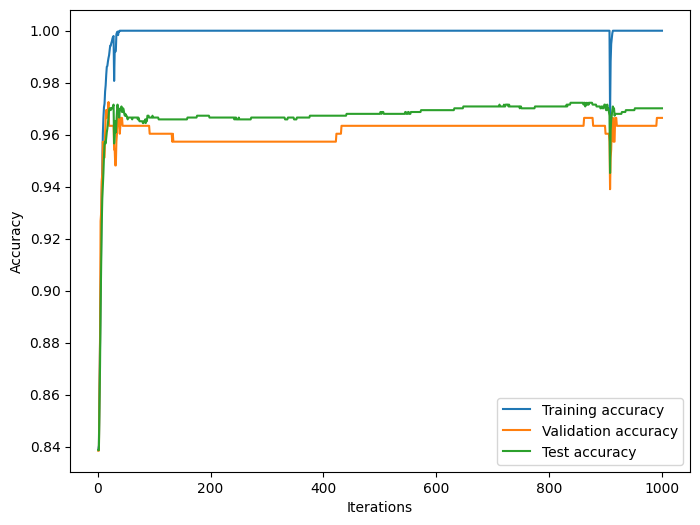

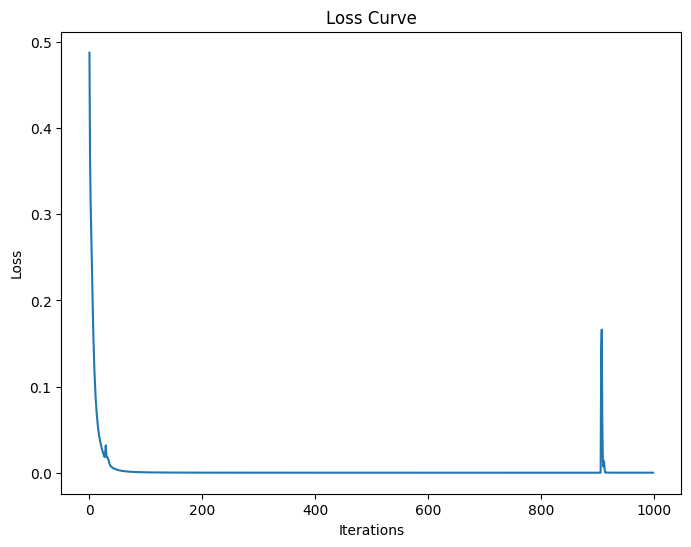

Overall Training Accuracy: 1.0
Overall Validation Accuracy: 0.9664634146341463
Overall Test Accuracy: 0.9701492537313433


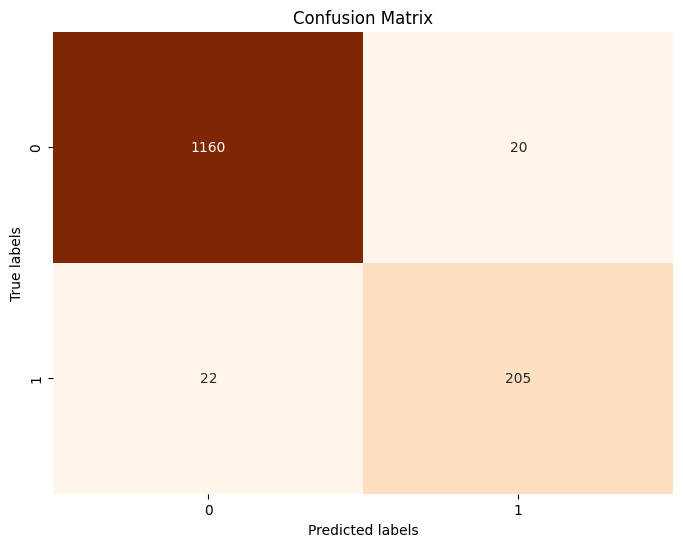

In [12]:
# Create an MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(40,50,60), max_iter=1000, random_state=42)

# Create arrays to store train, validation, and test accuracies
train_accuracies = []
val_accuracies = []
test_accuracies = []

# Run the classifier 1000 times and record accuracies
for i in range(1000):
    mlp.partial_fit(X_train, y_train, classes=np.unique(y_train))
    train_accuracies.append(mlp.score(X_train, y_train))
    val_accuracies.append(mlp.score(X_val, y_val))
    test_accuracies.append(mlp.score(X_test, y_test))

# Plot the training, validation, and test accuracies
plt.figure(figsize=(8, 6))
plt.plot(range(1, 1001), train_accuracies, label='Training accuracy')
plt.plot(range(1, 1001), val_accuracies, label='Validation accuracy')
plt.plot(range(1, 1001), test_accuracies, label='Test accuracy')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


#Display the loss curve
plt.figure(figsize=(8, 6))
plt.plot(mlp.loss_curve_)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.show()


#Calculate and print the train, validation, and test accuracies
train_accuracy = mlp.score(X_train, y_train)
validation_accuracy = mlp.score(X_val, y_val)
test_accuracy = mlp.score(X_test, y_test)
print(f"Overall Training Accuracy: {train_accuracy}")
print(f"Overall Validation Accuracy: {validation_accuracy}")
print(f"Overall Test Accuracy: {test_accuracy}")


#Calculate and display the confusion matrix
y_pred = mlp.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

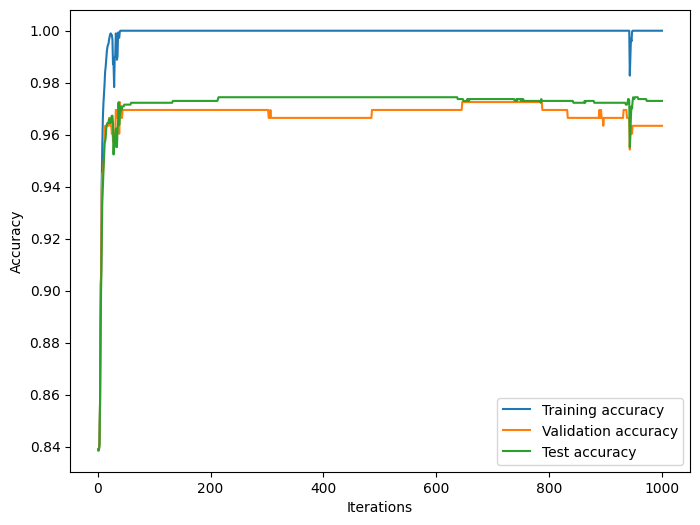

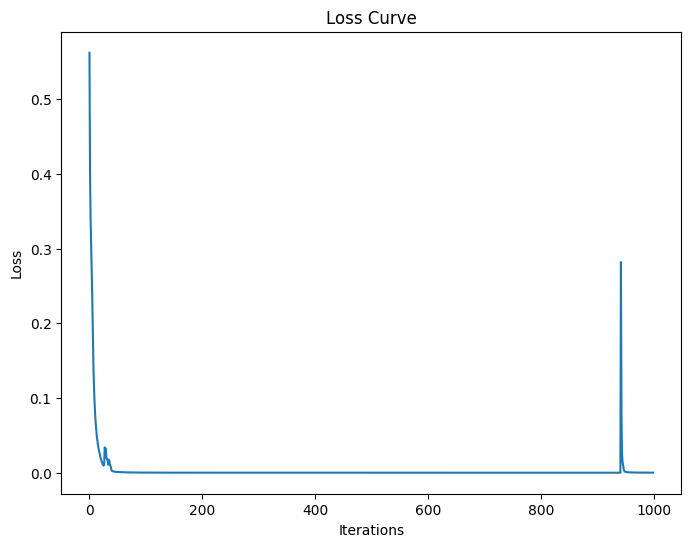

Overall Training Accuracy: 1.0
Overall Validation Accuracy: 0.9634146341463414
Overall Test Accuracy: 0.9729921819474058


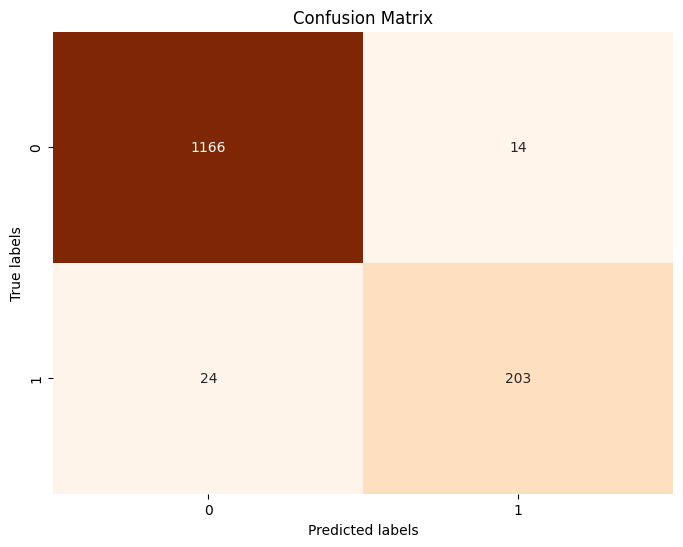

In [13]:
# Create an MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(40,50,60,70), max_iter=1000, random_state=42)

# Create arrays to store train, validation, and test accuracies
train_accuracies = []
val_accuracies = []
test_accuracies = []

# Run the classifier 1000 times and record accuracies
for i in range(1000):
    mlp.partial_fit(X_train, y_train, classes=np.unique(y_train))
    train_accuracies.append(mlp.score(X_train, y_train))
    val_accuracies.append(mlp.score(X_val, y_val))
    test_accuracies.append(mlp.score(X_test, y_test))

# Plot the training, validation, and test accuracies
plt.figure(figsize=(8, 6))
plt.plot(range(1, 1001), train_accuracies, label='Training accuracy')
plt.plot(range(1, 1001), val_accuracies, label='Validation accuracy')
plt.plot(range(1, 1001), test_accuracies, label='Test accuracy')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


#Display the loss curve
plt.figure(figsize=(8, 6))
plt.plot(mlp.loss_curve_)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.show()


#Calculate and print the train, validation, and test accuracies
train_accuracy = mlp.score(X_train, y_train)
validation_accuracy = mlp.score(X_val, y_val)
test_accuracy = mlp.score(X_test, y_test)
print(f"Overall Training Accuracy: {train_accuracy}")
print(f"Overall Validation Accuracy: {validation_accuracy}")
print(f"Overall Test Accuracy: {test_accuracy}")


#Calculate and display the confusion matrix
y_pred = mlp.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

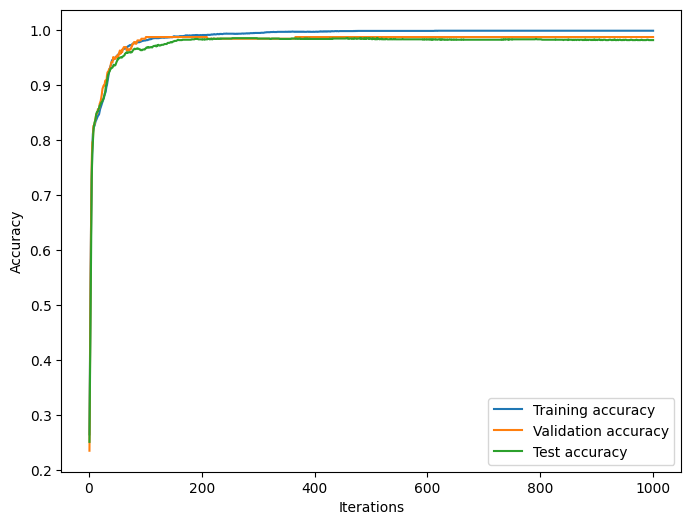

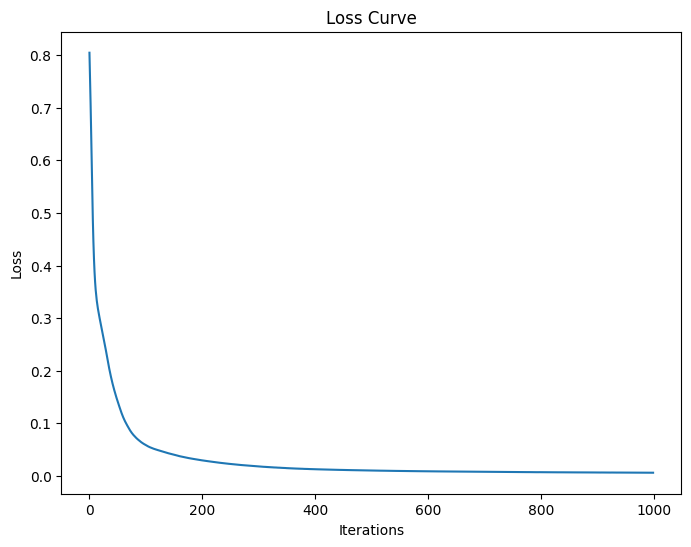

Overall Training Accuracy: 0.9993224932249323
Overall Validation Accuracy: 0.9878048780487805
Overall Test Accuracy: 0.9822316986496091


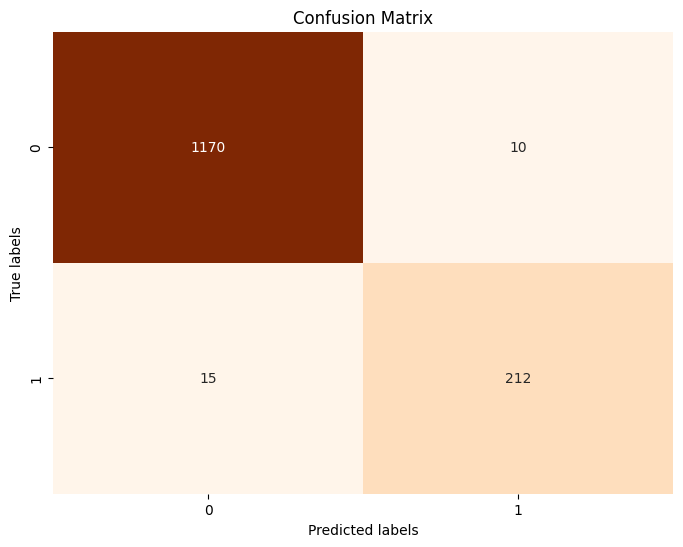

In [14]:
# Create an MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(4,5), max_iter=1000, random_state=42)

# Create arrays to store train, validation, and test accuracies
train_accuracies = []
val_accuracies = []
test_accuracies = []

# Run the classifier 1000 times and record accuracies
for i in range(1000):
    mlp.partial_fit(X_train, y_train, classes=np.unique(y_train))
    train_accuracies.append(mlp.score(X_train, y_train))
    val_accuracies.append(mlp.score(X_val, y_val))
    test_accuracies.append(mlp.score(X_test, y_test))

# Plot the training, validation, and test accuracies
plt.figure(figsize=(8, 6))
plt.plot(range(1, 1001), train_accuracies, label='Training accuracy')
plt.plot(range(1, 1001), val_accuracies, label='Validation accuracy')
plt.plot(range(1, 1001), test_accuracies, label='Test accuracy')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


#Display the loss curve
plt.figure(figsize=(8, 6))
plt.plot(mlp.loss_curve_)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.show()


#Calculate and print the train, validation, and test accuracies
train_accuracy = mlp.score(X_train, y_train)
validation_accuracy = mlp.score(X_val, y_val)
test_accuracy = mlp.score(X_test, y_test)
print(f"Overall Training Accuracy: {train_accuracy}")
print(f"Overall Validation Accuracy: {validation_accuracy}")
print(f"Overall Test Accuracy: {test_accuracy}")


#Calculate and display the confusion matrix
y_pred = mlp.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

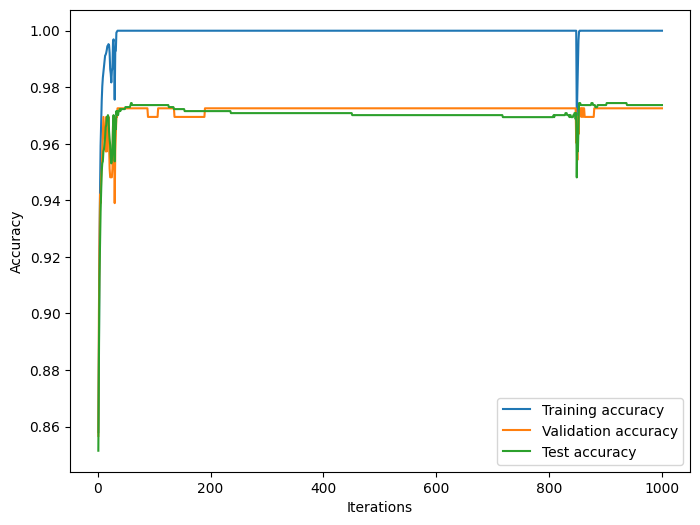

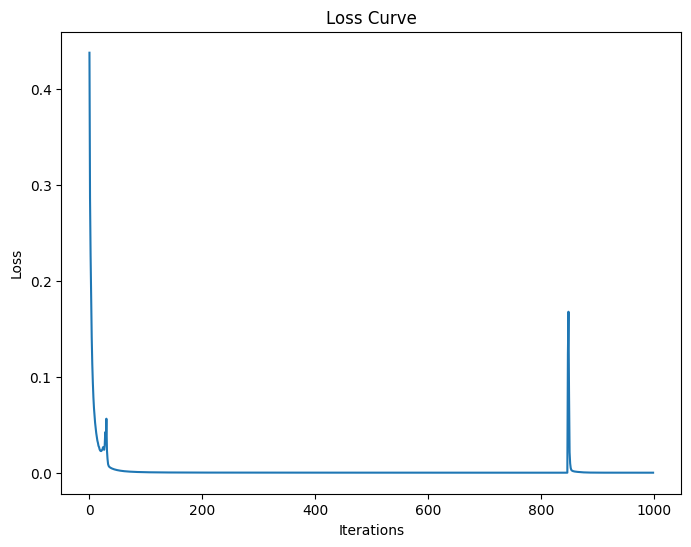

Overall Training Accuracy: 1.0
Overall Validation Accuracy: 0.9725609756097561
Overall Test Accuracy: 0.9737029140014215


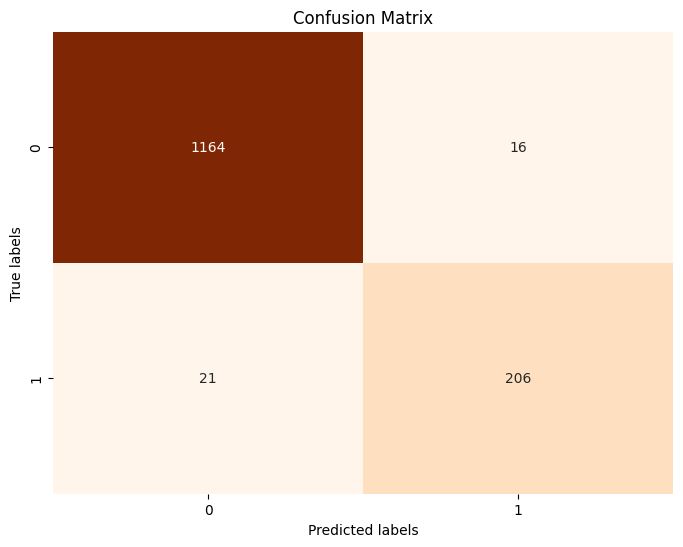

In [15]:
# Create an MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(200,250), max_iter=1000, random_state=42)

# Create arrays to store train, validation, and test accuracies
train_accuracies = []
val_accuracies = []
test_accuracies = []

# Run the classifier 1000 times and record accuracies
for i in range(1000):
    mlp.partial_fit(X_train, y_train, classes=np.unique(y_train))
    train_accuracies.append(mlp.score(X_train, y_train))
    val_accuracies.append(mlp.score(X_val, y_val))
    test_accuracies.append(mlp.score(X_test, y_test))

# Plot the training, validation, and test accuracies
plt.figure(figsize=(8, 6))
plt.plot(range(1, 1001), train_accuracies, label='Training accuracy')
plt.plot(range(1, 1001), val_accuracies, label='Validation accuracy')
plt.plot(range(1, 1001), test_accuracies, label='Test accuracy')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


#Display the loss curve
plt.figure(figsize=(8, 6))
plt.plot(mlp.loss_curve_)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.show()


#Calculate and print the train, validation, and test accuracies
train_accuracy = mlp.score(X_train, y_train)
validation_accuracy = mlp.score(X_val, y_val)
test_accuracy = mlp.score(X_test, y_test)
print(f"Overall Training Accuracy: {train_accuracy}")
print(f"Overall Validation Accuracy: {validation_accuracy}")
print(f"Overall Test Accuracy: {test_accuracy}")


#Calculate and display the confusion matrix
y_pred = mlp.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

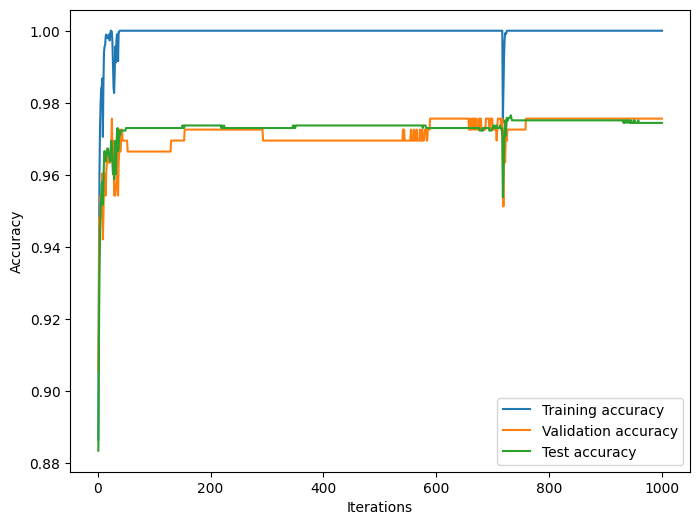

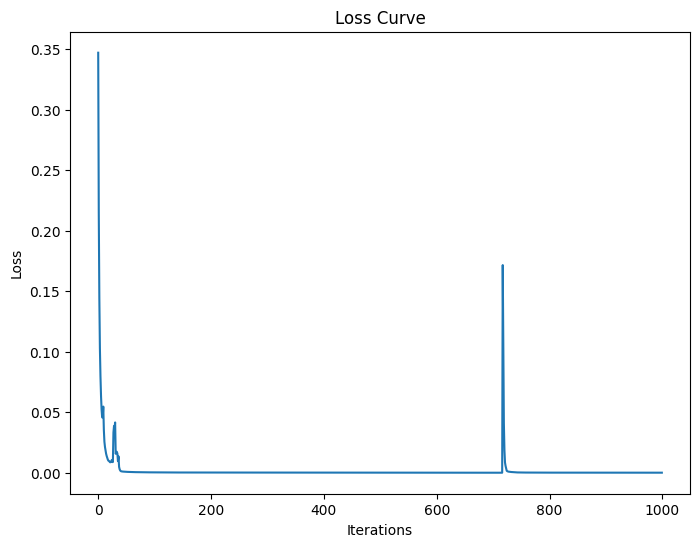

Overall Training Accuracy: 1.0
Overall Validation Accuracy: 0.975609756097561
Overall Test Accuracy: 0.9744136460554371


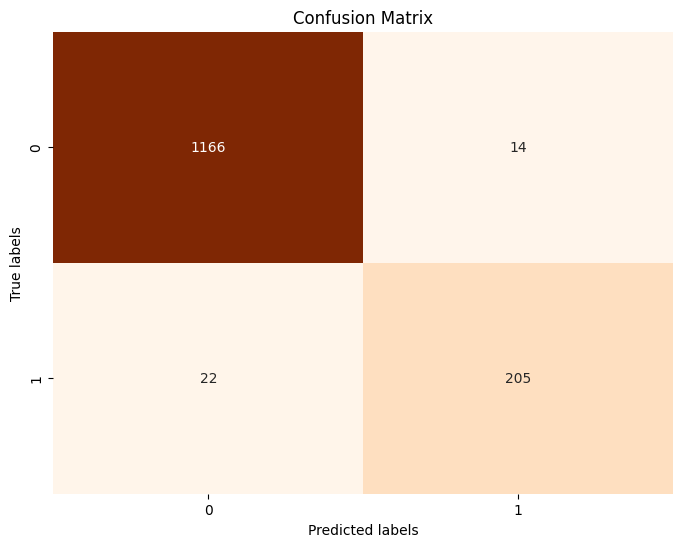

In [16]:
# Create an MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(400,500), max_iter=1000, random_state=42)

# Create arrays to store train, validation, and test accuracies
train_accuracies = []
val_accuracies = []
test_accuracies = []

# Run the classifier 1000 times and record accuracies
for i in range(1000):
    mlp.partial_fit(X_train, y_train, classes=np.unique(y_train))
    train_accuracies.append(mlp.score(X_train, y_train))
    val_accuracies.append(mlp.score(X_val, y_val))
    test_accuracies.append(mlp.score(X_test, y_test))

# Plot the training, validation, and test accuracies
plt.figure(figsize=(8, 6))
plt.plot(range(1, 1001), train_accuracies, label='Training accuracy')
plt.plot(range(1, 1001), val_accuracies, label='Validation accuracy')
plt.plot(range(1, 1001), test_accuracies, label='Test accuracy')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


#Display the loss curve
plt.figure(figsize=(8, 6))
plt.plot(mlp.loss_curve_)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.show()


#Calculate and print the train, validation, and test accuracies
train_accuracy = mlp.score(X_train, y_train)
validation_accuracy = mlp.score(X_val, y_val)
test_accuracy = mlp.score(X_test, y_test)
print(f"Overall Training Accuracy: {train_accuracy}")
print(f"Overall Validation Accuracy: {validation_accuracy}")
print(f"Overall Test Accuracy: {test_accuracy}")


#Calculate and display the confusion matrix
y_pred = mlp.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()